In [2]:
import json
import numpy as np
from transformers import AutoTokenizer
from multiprocessing import Pool, cpu_count


In [3]:
corpus_path="/opt/ml/data/wikipedia_documents.json"
with open(corpus_path) as f :
    corpus=json.load(f)
contexts = list(
            dict.fromkeys([v["text"] for v in corpus.values()])
        )

In [4]:
tokenizer_name="danielkim/klue-longformer-large"
tokenizer=AutoTokenizer.from_pretrained(tokenizer_name)

In [5]:
pool=Pool(cpu_count())

tokenized_contexts=pool.map(tokenizer.tokenize,contexts)


Token indices sequence length is longer than the specified maximum sequence length for this model (6386 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5937 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (13963 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9573 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16618 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence le

In [6]:
len_context=pool.map(len,tokenized_contexts)
index=np.argsort(len_context)

In [7]:
#가장 큰거 원문
print(contexts[index[-1]])

어딘 실이니 례예 여재라

○ 呂滎公名希哲, 字原明. 申國正獻公之長子. 正獻公居家, 簡 重寡黙, 不以事物經心, 而申國夫人, 性嚴有法度, 雖甚愛公, 然, 敎公, 事事循蹈規矩.

呂榮公의 일홈 希哲이오 字 原明이니 申國 正獻公 [일홈  公著ㅣ니 申은 봉 히오 正獻은 시회니 宋 적 졍승이 라] 의 아이라 正獻公이 집의 이실 제 간략며 후듕며 잡일 아니며 잡말 아니야 일과 온갓 거스로 애 경 영티 아니고 申國夫人이 性이 嚴고 法度ㅣ 이셔 비록 심 히 公을 랑나 그러나 公을 츄  規矩 조차 드듸게 더라

甫十歲, 祁寒暑雨, 侍立終日, 不命之坐, 不敢坐也. 日必冠帶, 以見長者, 平居雖甚熱, 在父母長者之側, 不得去巾襪縳袴, 衣 服唯謹.

계오 열 설에 큰 치위와 덥고 비올 제라두 뫼셔 셧기를 날이 도록 야 命야 안라 아니커든 敢히 안 아니더라 날마다 반시 冠帶야  얼우신 뵈오며 샹해 이실 제 비록 심히 더우나 父母와 얼우신 겯틔 이셔 시러곰 곳갈와 보 션과 뎐 밧디 아니야 衣服을 오직 삼가더라

行步出入, 無得入茶肆酒肆, 市井里巷之語, 鄭衛之音, 未嘗一 經於耳, 不正之書, 非禮之色, 未嘗一接於目.

녀 거러 나며 들음애 시러곰 차  집과 술  집의 드 디 아니며 져제와  말와 鄭과 衛ㅅ 소 [두 나라 일 홈이니 음탕 풍라] 를 일즉 번 귀예 디내디 아니며 正티 아니 글월와 禮 아닌 빗 일즉 번 눈에 브티디 아 니더라

正獻公通判潁州, 歐陽公適知州事. 焦先生千之伯强, 客文忠公 所, 嚴毅方正, 正獻公招延之, 使敎諸子. 諸生小有過差, 先生 端坐, 召與相對, 終日竟夕, 不與之語, 諸生恐懼畏伏, 先生方 略降辭色.

正獻公이 穎州 [고을 일홈이라]ㅣ예 通判 [판관 톄엿 벼슬이 라] 여실 제 歐陽公 [일홈은 修ㅣ니 宋 적 샹이라] 이 州 事를 지엿더니 [아단 말이니 목 톄엿 벼슬이라] 焦 先生 千之 伯强 [千之 일홈이오 伯强은 라] 이 文忠公 [歐陽公 시회라] 

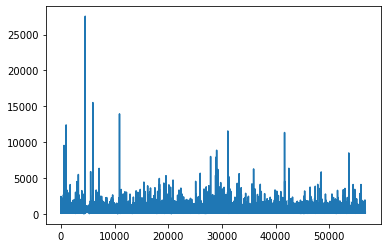

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.DataFrame(len_context,columns=['length'])
plt.plot(df)

In [10]:
print("max_length 512 일때 잘리는 갯수 : ",sum(df['length'] > 512))
print("max_length 4096 일때 잘리는 갯수 : ",sum(df['length'] > 4096))

max_length 512 일때 잘리는 갯수 :  11189
max_length 4096 일때 잘리는 갯수 :  50
